In [ ]:
# for google colab
%tensorflow_version 2.x

# 이미지 분류를 위한 CNN : Convolution Neural Network

#### NumPy Array Image만들기

(120, 120)
(120, 120, 3)


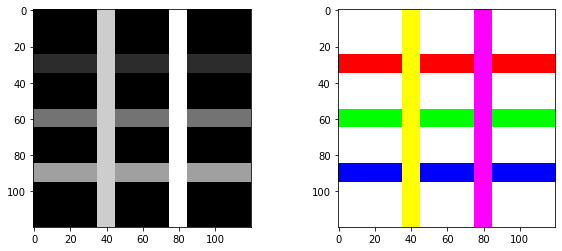

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35, :] = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65, :] = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95, :] = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255      
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]      
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

### Convolution 연산 실습

input img: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape: (1, 3, 3, 1)
fillter:(2, 2, 1, 1) 
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
filltered:
 [[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]]
out : [[ 8. 12.]
 [20. 24.]]


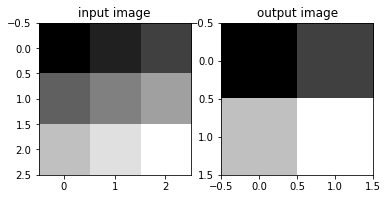

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(f'input img: \n {img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

x = np.float32(img.reshape(1,3,3,1))
print(f'input shape: {x.shape}')

filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(f'fillter:{filter.shape} \n{filter}')

stride = 1
fillterd = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME
print(f'filltered:\n {fillterd}')

out = fillterd.numpy().reshape(2,2)
print(f'out : {out}')

plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

### Convolution 연산 실습2 (엣지 검출)

Text(0.5, 1.0, 'gx + gy')

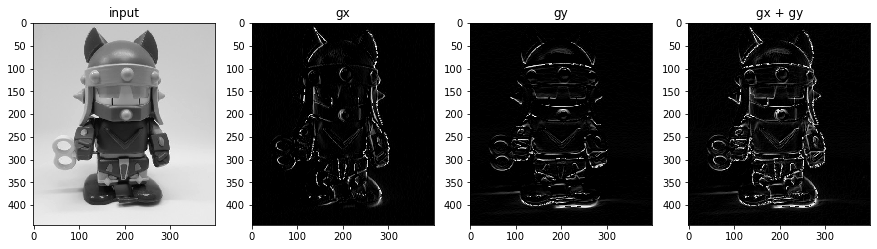

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

# x 방향 미분 커널
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

# y 방향 미분 커널
gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

gx = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = gx.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

gy = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = gy.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

#### Pooling을 이용한 특징 축소 사례
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

#### Pooling을 이용한 특징 축소 사례 2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

## TF Max Pool

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


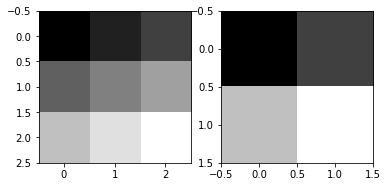

In [ ]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = 2 # [2,2] or [1,2,2,1]
strides = 1 # [1,1] or [1,1,1,1]

pool = tf.nn.max_pool(x, ksize=ksize, strides=strides, padding='VALID')
pooled = pool.numpy()
print(pooled)
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()

## MaxPool을 이용한 특징 검출

(1, 444, 400, 1)
(1, 44, 40, 1)


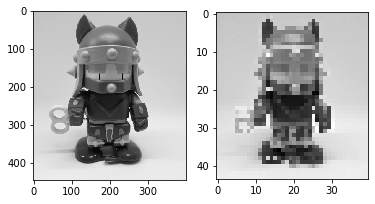

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pooled = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
pooled = pooled.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

## MNIST 숫자 손글씨 인식

In [ ]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

### LeNet-5을 이용한 MNIST

In [ ]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = make_LeNet(input_shape=(28,28,1))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3230 - accuracy: 0.9009 - val_loss: 0.0877 - val_accuracy: 0.9722
Epoch 2/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.0929 - accuracy: 0.9727 - val_loss: 0.0674 - val_accuracy: 0.9808
Epoch 3/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0519 - val_accuracy: 0.9870
Epoch 4/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0545 - accuracy: 0.9838 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 5/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.0473 - accuracy: 0.9861 - val_loss: 0.0428 - val_accuracy: 0.9888
Epoch 6/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0432 - val_accuracy: 0.9882
Epoch 7/10
55000/55000 [==============================] -

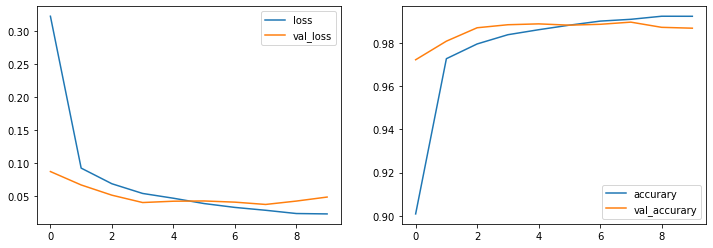

In [ ]:
import matplotlib.pyplot as plt

def drawPlot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label="loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],  label="accurary")
    plt.plot(history.history['val_accuracy'], label="val_accurary")
    plt.legend()
    plt.show()
drawPlot(history)

## Pre-trained Model
* VGG16

In [3]:
from tensorflow.keras.applications import VGG16

IMG_SIZE = 224
vgg16 = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

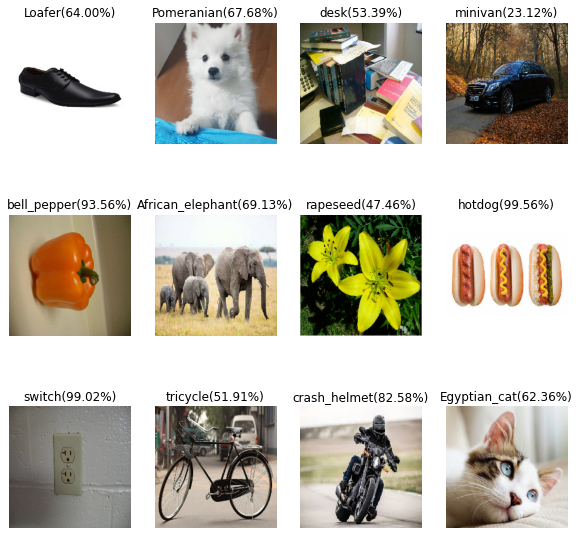

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

test_dir_path = './img/others/*.*'
test_paths = glob.glob(test_dir_path)

plt.figure(figsize=(10,10))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)#, dtype=np.uint8)
    img_arr = tf.expand_dims(img_arr, 0)

    pred = vgg16.predict(preprocess_input(img_arr))
    decoded = decode_predictions(pred)[0]
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')
    plt.axis('off')
plt.show()

### Transfer Learning
* VGG16 loading for TL


In [6]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('conv_base를 동결 전 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 전 학습 가중치 변수 층 수: 30


In [9]:
conv_base.trainable = False

In [10]:
print('conv_base를 동결 후 학습 가중치 변수 층 수:', 
      len(model.trainable_weights))

conv_base를 동결 후 학습 가중치 변수 층 수: 4


### Kaggle Dogs vs. Cats     
* https://www.kaggle.com/c/dogs-vs-cats/data
* 설치
    * `!pip install kaggle`

In [11]:
import os
os.environ['KAGGLE_USERNAME'] = 'jaen11487'
os.environ['KAGGLE_KEY'] = '1e7109f613a54cba533ab49ab46927ff'
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 35.8MB/s]
 99% 537M/543M [00:04<00:00, 101MB/s]
100% 543M/543M [00:04<00:00, 118MB/s]
100% 270M/271M [00:02<00:00, 104MB/s] 
100% 271M/271M [00:02<00:00, 100MB/s]


###### Unzip,  Directory 구성


In [12]:
import zipfile
import os
dir_path = 'cat_dog'

In [13]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

In [14]:
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)

###### 준비된 디렉토리에 파일 복사
* test 디렉토리에 25% 할당

In [15]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

copy done.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이타, 증식 없슴
train_generator = train_datagen.flow_from_directory(
        os.path.join(dir_path, 'train'), # 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dir_path, 'test'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 18801 images belonging to 2 classes.
Found 6199 images belonging to 2 classes.


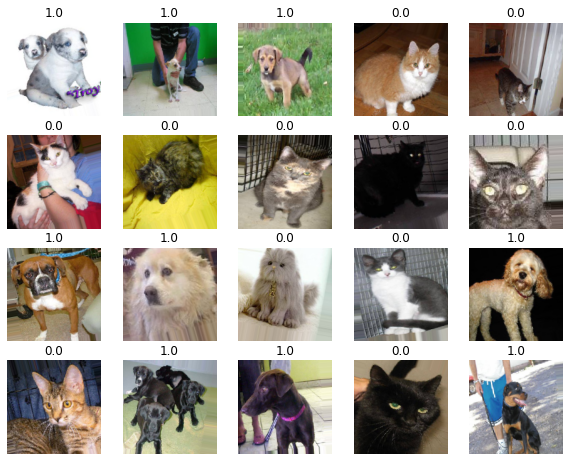

In [18]:
image_batch, label_batch = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5), # argument is deprecated. use learning_rate=2e-5
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 590s - loss: 0.5541 - acc: 0.7385 - val_loss: 0.4303 - val_acc: 0.8230
Epoch 2/30
100/100 - 590s - loss: 0.4108 - acc: 0.8350 - val_loss: 0.3598 - val_acc: 0.8490
Epoch 3/30
100/100 - 586s - loss: 0.3659 - acc: 0.8445 - val_loss: 0.3355 - val_acc: 0.8510
Epoch 4/30
100/100 - 586s - loss: 0.3497 - acc: 0.8530 - val_loss: 0.3220 - val_acc: 0.8600
Epoch 5/30
100/100 - 587s - loss: 0.3359 - acc: 0.8490 - val_loss: 0.2903 - val_acc: 0.8770
Epoch 6/30
100/100 - 586s - loss: 0.3015 - acc: 0.8715 - val_loss: 0.3088 - val_acc: 0.8720
Epoch 7/30
100/100 - 586s - loss: 0.3029 - acc: 0.8655 - val_loss: 0.2772 - val_acc: 0.8950
Epoch 8/30
100/100 - 586s - loss: 0.3086 - acc: 0.8620 - val_loss: 0.2637 - val_acc: 0.8930
Epoch 9/30
100/100 - 587s - loss: 0.2991 - acc: 0.8705 - val_loss: 0.2755 - val_acc: 0.8800
Epoch 10/30
100/100 - 587s - loss: 0.3196 - acc: 0.8605 - val_loss: 0.2567 - val_acc: 0.8920
Epoch 11/30
100/100 - 587s - loss: 0.2727 - acc: 0.8860 - val_loss: 0.2618 - va

In [ ]:
loss_after,accuracy_after = model.evaluate(validation_generator)
print("Test Accuracy:{}".format(accuracy_after))

  ...
    to  
  ['...']
319/319 [==============================] - 42s 131ms/step - loss: 0.2215 - acc: 0.9081
Test Accuracy:0.9080640077590942


In [ ]:
model.save('cats_and_dogs_small_3.h5')

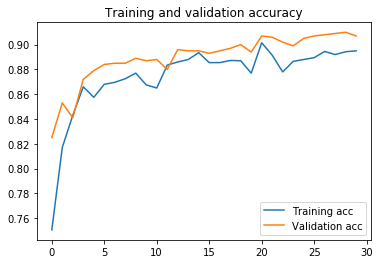

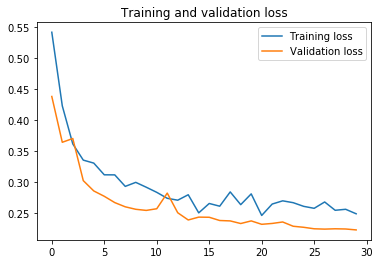

In [ ]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

###### VGGNet 개,고양이 분류 테스트

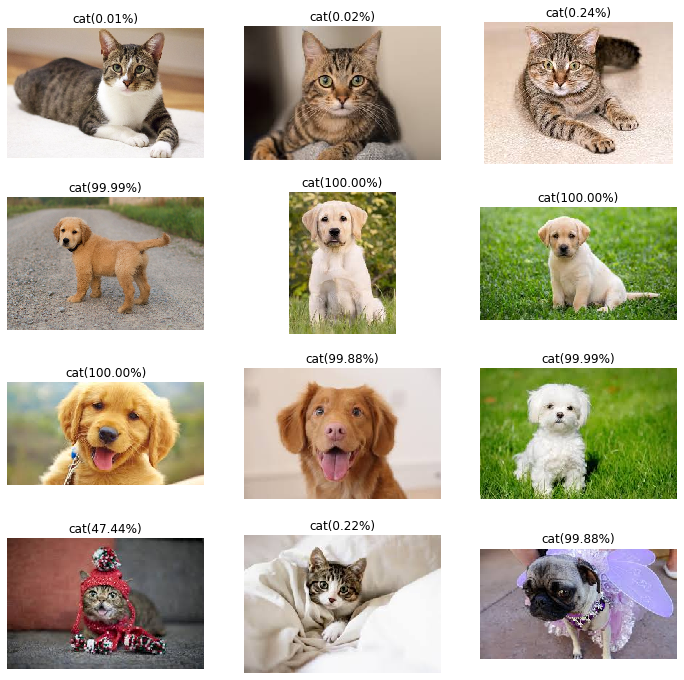

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2,glob,math,numpy as np
import matplotlib.pyplot as plt

pet_dir = './img/pet/*.*'
labels = ['cat', 'dog']
IMG_SIZE = 150
model = tf.keras.models.load_model('cats_and_dogs_small_3.h5')
paths =  glob.glob(pet_dir)
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)
    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  labels[label.numpy()]
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')